<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Words_In_Phone_Number_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Words In Phone Number

If you open the keypad of your mobile phone, it'll likely look like this:

```
   ----- ----- -----
  |     |     |     |
  |  1  |  2  |  3  |
  |     | abc | def |
   ----- ----- -----
  |     |     |     |
  |  4  |  5  |  6  |
  | ghi | jkl | mno |
   ----- ----- -----
  |     |     |     |
  |  7  |  8  |  9  |
  | pqrs| tuv | wxyz|
   ----- ----- -----
        |     |
        |  0  |
        |     |
         -----
```



Almost every digit is associated with some letters in the alphabet; this allows certain phone numbers to spell out actual words. For example, the phone number `2536368` can be written as `clement`; similarly, the phone number `2686463` can be written as `antoine` or as `ant6463`.

It's important to note that a phone number doesn't represent a single sequence of letters, but rather multiple combinations of letters. For instance, the digit `2` can represent three different letters (a, b, and c).

You're given a stringified phone number of any non-zero length and a non-empty list of lowercase english-alphabet words.

Write a function that returns the list of words that can be found in the phone number. The final words don't need to be in any particular order.

Note that you should rely on the keypad illustrated above for digit-letter associations.

Sample Input

```
phoneNumber = "3662277"
words = ["foo", "bar", "baz", "foobar", "emo", "cap", "car", "cat"]
```



Sample Output

```
["bar", "cap", "car", "emo", "foo", "foobar"] 
// The words could be ordered differently.
```



# Solution 1: Naive Solution

In [1]:
# Time = O(m*n*w)
# Space = O(m*w)

# n = len(phoneNumber)
# m = len(words)
# w = len(the longest word)

def wordsInPhoneNumber(phoneNumber, words):
  words_in_phone_number = set()
  for word in words:
    number_of_word = convert_word_to_number(word)
    for idx in range(len(phoneNumber)):
      number_of_word_idx = 0
      phone_number_idx = idx

      while number_of_word_idx < len(number_of_word) and phone_number_idx < len(phoneNumber) and str(number_of_word[number_of_word_idx]) == str(phoneNumber[phone_number_idx]):
        number_of_word_idx += 1
        phone_number_idx += 1

      if number_of_word_idx == len(number_of_word):
        words_in_phone_number.add(word)
        break

  return list(words_in_phone_number)

def convert_word_to_number(word):
  letter_number_dict = {'a': 2, 'b': 2, 'c': 2, 'd': 3, 'e': 3, 'f': 3, 
        'g': 4, 'h': 4, 'i': 4, 'j': 5, 'k': 5, 'l': 5, 'm': 6, 'n': 6, 'o': 6,
        'p': 7, 'q': 7, 'r': 7, 's': 7, 't': 8, 'u': 8, 'v': 8, 'w': 9, 'x': 9, 'y': 9, 'z': 9
      }
  number_of_word = []
  for char in word:
    number_of_word.append(letter_number_dict[char])
  return number_of_word	

In [2]:
phoneNumber = "3662277"
words = ["foo", "bar", "baz", "foobar", "emo", "cap", "car", "cat"]
wordsInPhoneNumber(phoneNumber, words)

['emo', 'foobar', 'cap', 'bar', 'car', 'foo']

In [3]:
phoneNumber = "5264267863239228774226854252498472256368874674862793248568647529852299974756997369959678845275823247"
words = ["s", "xhv", "bjhj", "ir", "wmvb", "mh", "zxr", "lzpfv", "dfqa", "d", "lvai", "t", "lw", "bibkj", "y", "slsrt", "upco", "cn", "ioqyg", "ejb", "xfm", "rdpm", "np", "zx", "rhl", "ozxk", "sryi", "o", "hfsw", "mytq", "gyc", "ca", "byaem", "kbq", "pr", "u", "aq", "bwf", "hxz", "lxv", "x", "kfjnv", "rr", "fvqwl", "tt", "wj", "wg", "jo", "lwrq", "m", "sjg", "wdd", "cvi", "umh", "l", "pb", "hz", "e", "aptx", "f", "mhh", "c", "zhq", "ucs", "rs", "gdmg", "ntbg", "hpb", "ih", "apf", "dv", "uyn", "fd", "rchnu", "heu", "huunj", "wxfs", "zo", "n"]
print(wordsInPhoneNumber(phoneNumber, words))

['l', 'c', 'pb', 'jo', 'd', 'pr', 'rs', 'm', 'cn', 'aq', 'mh', 'o', 'x', 'n', 'zx', 'tt', 'ca', 'hz', 'lw', 'zo', 's', 'ir', 'e', 'wj', 'y', 'kbq', 'rr', 'u', 'zxr', 't', 'np', 'umh', 'f', 'hpb', 'ozxk']


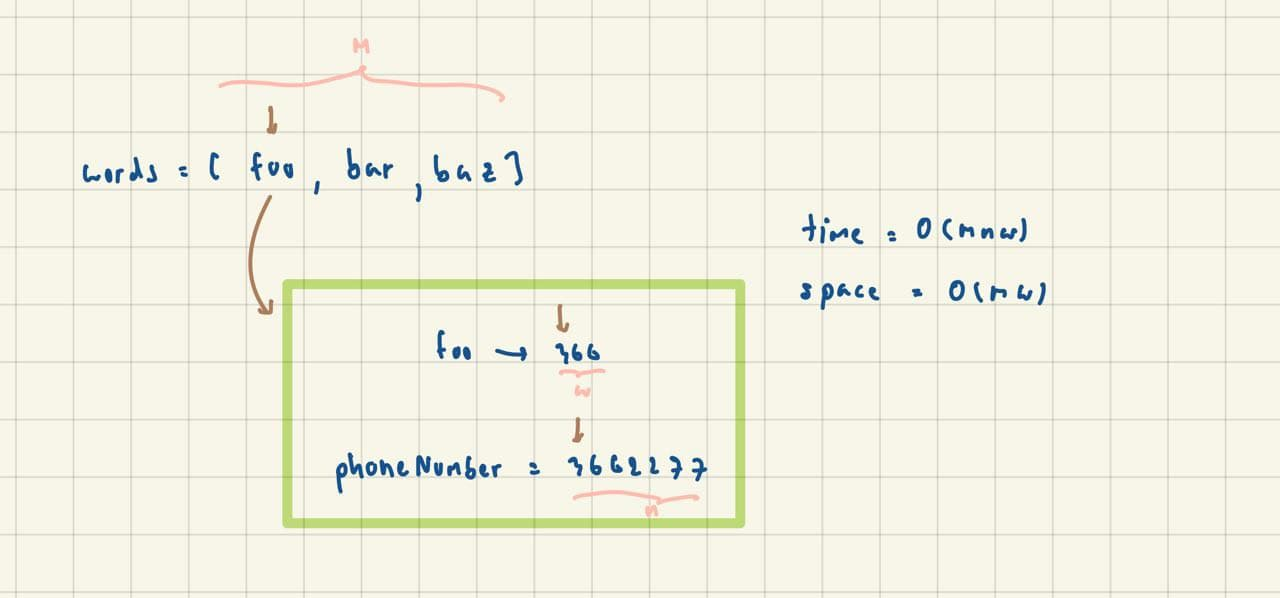


# Solution 2: Trie

In [4]:
# Time = O(n^2 + m*w)
# Space = O(n^2 + m*w)

# n = len(phoneNumber)
# m = len(words)
# w = len(the longest word)

def wordsInPhoneNumber(phoneNumber, words):
  phone_number_suffix_trie = SuffixTrie(phoneNumber)
  return list(filter(lambda word: is_word_in_phone_number(phone_number_suffix_trie, word), words))

def is_word_in_phone_number(phone_number_suffix_trie, word):
  digits_of_word = word_to_digits(word)
  return phone_number_suffix_trie.contain(digits_of_word)

def word_to_digits(word):
  digit_to_word_dict = {'a': '2', 'b': '2', 'c': '2', 'd': '3', 'e': '3', 'f': '3', 
                        'g': '4', 'h': '4', 'i': '4', 'j': '5', 'k': '5', 'l': '5', 'm': '6', 'n': '6', 'o': '6',
                        'p': '7', 'q': '7', 'r': '7', 's': '7', 't': '8', 'u': '8', 'v': '8', 'w': '9', 'x': '9', 'y': '9', 'z': '9'
                        }
  return ''.join(map(lambda letter: digit_to_word_dict[letter], list(word)))

class SuffixTrie:
  def __init__(self, string):
    self.root = {}
    self.build_suffix_trie(string)
  
  def build_suffix_trie(self, string):
    for i in range(len(string)):
      current_node = self.root
      for j in range(i, len(string)):
        char = string[j]
        if char not in current_node:
          current_node[char] = {}
        current_node = current_node[char]

  def contain(self, string):
    current_node = self.root
    for char in string:
      if char not in current_node:
        return False
      current_node = current_node[char]
    return True

In [5]:
phoneNumber = "3662277"
words = ["foo", "bar", "baz", "foobar", "emo", "cap", "car", "cat"]
wordsInPhoneNumber(phoneNumber, words)

['foo', 'bar', 'foobar', 'emo', 'cap', 'car']

In [6]:
phoneNumber = "5264267863239228774226854252498472256368874674862793248568647529852299974756997369959678845275823247"
words = ["s", "xhv", "bjhj", "ir", "wmvb", "mh", "zxr", "lzpfv", "dfqa", "d", "lvai", "t", "lw", "bibkj", "y", "slsrt", "upco", "cn", "ioqyg", "ejb", "xfm", "rdpm", "np", "zx", "rhl", "ozxk", "sryi", "o", "hfsw", "mytq", "gyc", "ca", "byaem", "kbq", "pr", "u", "aq", "bwf", "hxz", "lxv", "x", "kfjnv", "rr", "fvqwl", "tt", "wj", "wg", "jo", "lwrq", "m", "sjg", "wdd", "cvi", "umh", "l", "pb", "hz", "e", "aptx", "f", "mhh", "c", "zhq", "ucs", "rs", "gdmg", "ntbg", "hpb", "ih", "apf", "dv", "uyn", "fd", "rchnu", "heu", "huunj", "wxfs", "zo", "n"]
print(wordsInPhoneNumber(phoneNumber, words))

['s', 'ir', 'mh', 'zxr', 'd', 't', 'lw', 'y', 'cn', 'np', 'zx', 'ozxk', 'o', 'ca', 'kbq', 'pr', 'u', 'aq', 'x', 'rr', 'tt', 'wj', 'jo', 'm', 'umh', 'l', 'pb', 'hz', 'e', 'f', 'c', 'rs', 'hpb', 'zo', 'n']


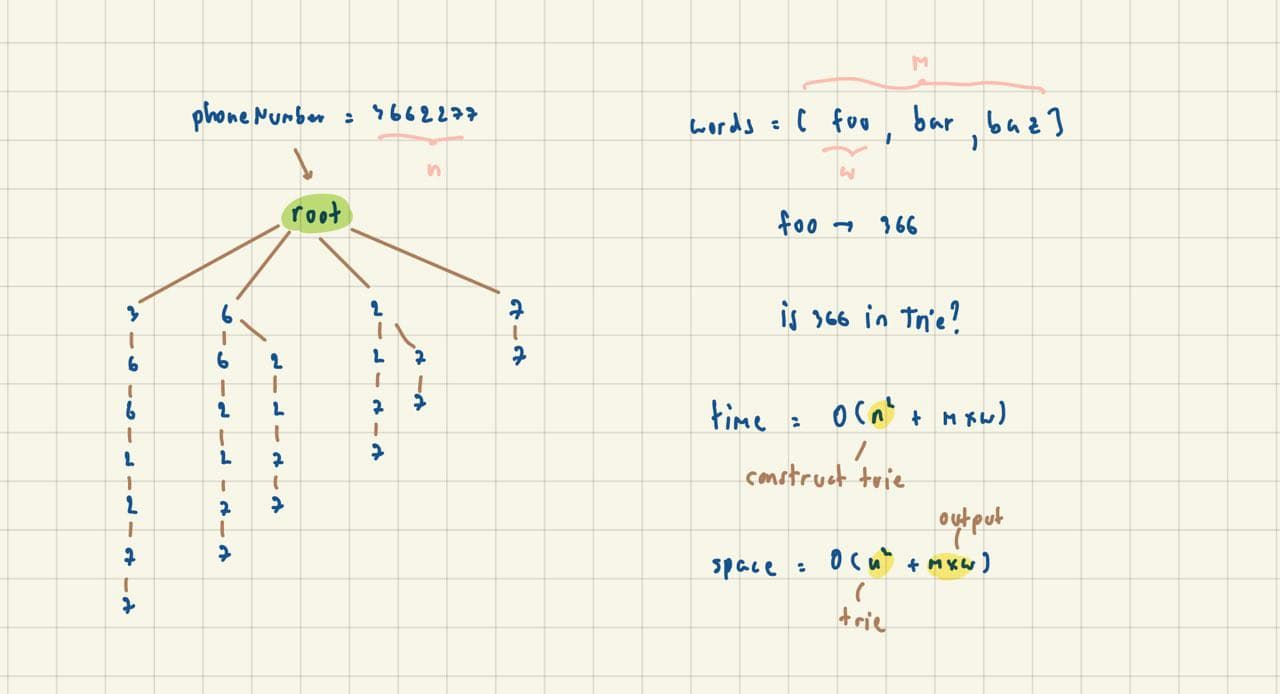

